# WeatherPy
----

### Analysis
Question: What is the weather like as we approach the equator?
* The data analyzed was based on weather in random, normally distributed cities with a population greater than 500, across the globe, using the full range of latitudes and longitudes.   Weather outside of a city location was not analyzed, so leans more toward inhabitable areas.  
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). 
* There does not appear to be a correlation between cloudiness and proximity to the equator (0 Deg. Latitude).
* There appears to be a wider range of Wind Speed between 40 to 80 degrees latitude at this time of year. 
* There is a wider range of humidity as you move away from the equator in both the Northern and Southern hemispheres.  
* At this time of year (October), the Northern Hemisphere is approaching winter (Fall - usually December 22 to March 20), while the Southern Hemisphere is approaching summer (Springtime!).  This might account for the warmer trend in the southern hemisphere.  It would be good to combine historical data for the inverse of this situation to balance the analysis. 
*    Another possibility for a trend toward the Northern Hemisphere might be that “90% of the human population is in the Northern Hemisphere with the rest residing in the Southern Hemisphere.”  (https://sciencing.com/differences-between-northern-southern-hemisphere-8260091.html)


---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import date
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Today's Date
date = str(date.today())
print(date)

2018-10-20


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations with uniform distribution
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Using www.maxmind.com world city database (pop > 500)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
print(f" 'cities' is a list of {len(cities)} cities")

 'cities' is a list of 614 cities


In [4]:
print(cities)

['ngunguru', 'qaanaaq', 'manicore', 'manta', 'luderitz', 'taperoa', 'porto belo', 'lazaro cardenas', 'diu', 'sitka', 'port elizabeth', 'ushuaia', 'ribeira grande', 'san patricio', 'hithadhoo', 'rikitea', 'castro', 'hermanus', 'marshall', 'barentsburg', 'kodiak', 'ponta do sol', 'el alto', 'lebu', 'ahipara', 'bengkulu', 'albany', 'avarua', 'cayenne', 'kapaa', 'huilong', 'codrington', 'koungou', 'saskylakh', 'cape town', 'northam', 'chokurdakh', 'hamilton', 'tekax', 'georgetown', 'opuwo', 'tasiilaq', 'karratha', 'butaritari', 'sampit', 'kolvereid', 'new norfolk', 'pevek', 'attawapiskat', 'baykit', 'hofn', 'aklavik', 'severo-yeniseyskiy', 'victoria', 'rocha', 'taolanaro', 'padang', 'ngukurr', 'andujar', 'vaitape', 'port alfred', 'atuona', 'cockburn town', 'ketchikan', 'mys shmidta', 'nanortalik', 'husavik', 'baiima', 'busselton', 'west plains', 'longyearbyen', 'belushya guba', 'mataura', 'suleja', 'marawi', 'punta arenas', 'nizhneyansk', 'mogadishu', 'beyneu', 'dikson', 'cabo san lucas', 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#API config data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

In [6]:
#Create labels based on units that can be used for plotting later
def temp_label():
    if units == "Imperial":
        return ("(deg. F)")
    elif units == "Metric":
        return ("(deg. C)")
    else:
        return ("(K)")

In [7]:
#Query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [8]:
#Perform a weather check on at least 500 unique cities based on lat and Long
citylist = []
cloudiness = []
country= []
datetime = []
humidity = []
lat = []
lon = []
max_temp = []
min_temp = []
wind_speed = []

record = 1

print("Beginning Data Retrieval")
print("----------------------------------")
for city in cities:
    try:
        print(f"Processing Record {record}| {city}")
        weather_response = requests.get(query_url + city).json()
        citylist.append(weather_response['name'])
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        datetime.append(weather_response["dt"])
        humidity.append(weather_response["main"]["humidity"])
        lat.append(weather_response["coord"]["lat"])
        lon.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        min_temp.append(weather_response["main"]["temp_min"])
        wind_speed.append(weather_response["wind"]["speed"])
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
    #we want to move to the next record no matter if found or not. 
    finally:
        if record < 500:
            record = record + 1
        else:
            break
            
    
    

Beginning Data Retrieval
----------------------------------
Processing Record 1| ngunguru
Processing Record 2| qaanaaq
Processing Record 3| manicore
Processing Record 4| manta
Processing Record 5| luderitz
Processing Record 6| taperoa
Processing Record 7| porto belo
Processing Record 8| lazaro cardenas
Processing Record 9| diu
Processing Record 10| sitka
Processing Record 11| port elizabeth
Processing Record 12| ushuaia
Processing Record 13| ribeira grande
Processing Record 14| san patricio
Processing Record 15| hithadhoo
Processing Record 16| rikitea
Processing Record 17| castro
Processing Record 18| hermanus
Processing Record 19| marshall
Processing Record 20| barentsburg
City not found. Skipping...
Processing Record 21| kodiak
Processing Record 22| ponta do sol
Processing Record 23| el alto
Processing Record 24| lebu
Processing Record 25| ahipara
Processing Record 26| bengkulu
City not found. Skipping...
Processing Record 27| albany
Processing Record 28| avarua
Processing Record 29|

Processing Record 230| mahebourg
Processing Record 231| rawson
Processing Record 232| mokolo
Processing Record 233| victoria point
Processing Record 234| asayita
City not found. Skipping...
Processing Record 235| faanui
Processing Record 236| pandan
Processing Record 237| tevriz
Processing Record 238| kupang
Processing Record 239| sur
Processing Record 240| kruisfontein
Processing Record 241| huarmey
Processing Record 242| ballina
Processing Record 243| barrow
Processing Record 244| manzhouli
Processing Record 245| kigali
Processing Record 246| gat
Processing Record 247| jinchengjiang
City not found. Skipping...
Processing Record 248| arcata
Processing Record 249| shimoda
Processing Record 250| deniliquin
Processing Record 251| san policarpo
Processing Record 252| vestmannaeyjar
Processing Record 253| the valley
Processing Record 254| pangkalanbuun
Processing Record 255| jiayuguan
Processing Record 256| salym
Processing Record 257| port lincoln
Processing Record 258| wanning
Processing

Processing Record 466| omboue
Processing Record 467| poum
Processing Record 468| kyzyl-suu
Processing Record 469| riyadh
Processing Record 470| ereymentau
Processing Record 471| acapulco
Processing Record 472| necochea
Processing Record 473| port hardy
Processing Record 474| saint-joseph
Processing Record 475| decatur
Processing Record 476| yenagoa
Processing Record 477| bonavista
Processing Record 478| kloulklubed
Processing Record 479| adigeni
Processing Record 480| rocafuerte
Processing Record 481| iqaluit
Processing Record 482| sao sebastiao
Processing Record 483| alugan
Processing Record 484| corn island
Processing Record 485| vinh
Processing Record 486| shahr-e babak
Processing Record 487| yanchukan
City not found. Skipping...
Processing Record 488| mogadouro
Processing Record 489| bandarbeyla
Processing Record 490| dunedin
Processing Record 491| barcelos
Processing Record 492| bereda
Processing Record 493| khonuu
City not found. Skipping...
Processing Record 494| nalut
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#create a data frame from cities and associated data
weather = {"City" : citylist, "Cloudiness": cloudiness, "Country":country, 
          "Date":datetime, "Humidity":humidity, "Latitude":lat, "Longitude":lon,
          "Max Temp":max_temp,"Min Temp":min_temp, "Wind Speed":wind_speed}
weather_data = pd.DataFrame(weather)
#convert column with datetime(seconds since epoch unix datetime) to date
weather_data['Date'] = pd.to_datetime(weather_data['Date'],unit = 's')

#Export the dataframe to a csv
weather_data.to_csv("Output/weather.csv", encoding="utf-8", index=False)

#Visualize
weather_data.head()



,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Min Temp,Wind Speed
0,Ngunguru,0,NZ,2018-10-21 02:46:51,90,-35.62,174.50,63.55,63.55,8.52
1,Qaanaaq,20,GL,2018-10-21 02:46:51,100,77.48,-69.36,2.62,2.62,14.23
2,Manicore,24,BR,2018-10-21 02:46:52,94,-5.81,-61.30,78.22,78.22,2.04
3,Manta,68,RO,2018-10-21 02:46:52,87,45.10,24.10,42.71,42.71,2.71
4,Luderitz,48,NA,2018-10-21 02:00:00,93,-26.65,15.16,57.20,57.20,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

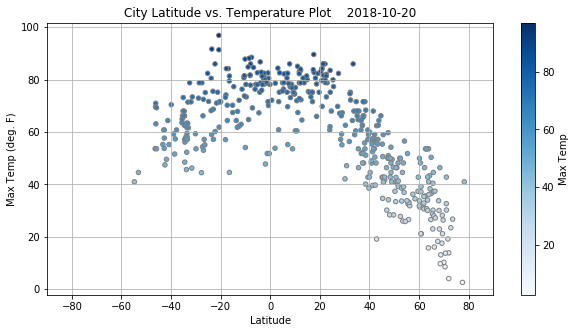

In [10]:
#Colormap - Jet would be good for color, binary is good for B&W?
cmap1 = cm.get_cmap("Blues")

#Create a scatter plot to compare Latitude vs. Max Temperature
#IMPORTANT  sharex = False will correct the pandas issue where the xaxis goes away..

fig1 = weather_data.plot.scatter(x = "Latitude", y = "Max Temp",
                                 grid = True, figsize = (10,5), 
                                 title = "City Latitude vs. Temperature Plot    " + date, 
                                 c = "Max Temp",cmap = cmap1,
                                 sharex = False ,edgecolors = "grey")
fig1.set_xlim(-90,90)
fig1.set_xlabel("Latitude")
fig1.set_ylabel(f"Max Temp {temp_label()}")

#Save figure as a .png
fig = fig1.get_figure()
fig.savefig("Output/LatvsTemp.png")

#Visualize
plt.show()

#### Latitude vs. Humidity Plot

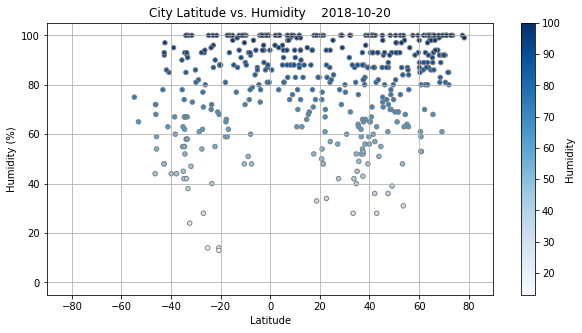

In [11]:
#Colormap - Jet would be good for color, binary is good for B&W?
cmap2 = cm.get_cmap("Blues")

#Create a scatter plot to compare Latitude vs. Humidity
fig2 = weather_data.plot.scatter(x = "Latitude", y = "Humidity", grid = True, figsize = (10,5),
                                title = "City Latitude vs. Humidity    " + date,
                                c = "Humidity", cmap = cmap2, sharex = False, edgecolors = "grey")
fig2.set_ylim(-5,105)
fig2.set_xlim(-90,90)
fig2.set_ylabel(f"Humidity (%)")

#Save figure as a .png
fig = fig2.get_figure()
fig.savefig("Output/LatvsHumidity.png")

#Visualize
plt.show()

#### Latitude vs. Cloudiness Plot

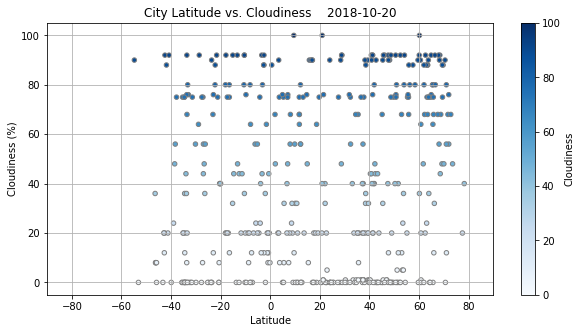

In [12]:
#Colormap - Jet would be good for color, binary is good for B&W?
cmap3 = cm.get_cmap("Blues")

#Create a scatter plot to compare Latitude vs. Cloudiness
fig3 = weather_data.plot.scatter(x = "Latitude", y = "Cloudiness", grid = True, figsize = (10,5),
                                 title = "City Latitude vs. Cloudiness    " + date,
                                 c = "Cloudiness", cmap = cmap3, sharex = False, edgecolors = "grey")
fig3.set_xlim(-90,90)
fig3.set_ylabel(f"Cloudiness (%)")

#Save figure as a .png
fig = fig3.get_figure()
fig.savefig("Output/LatvsCloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

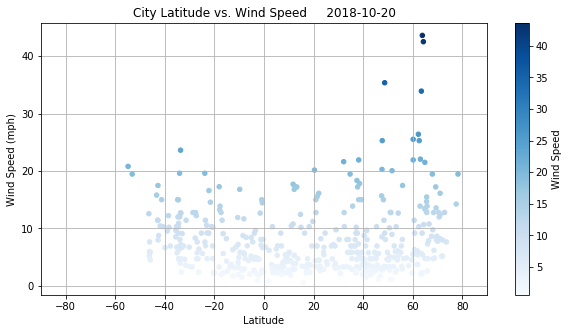

In [13]:
#Colormap - Jet would be good for color, binary is good for B&W?
cmap4 = cm.get_cmap('Blues')

#Create a scatter plot to compare Latitude vs. Wind Speed
fig4 = weather_data.plot.scatter(x = "Latitude", y = "Wind Speed", grid = True, figsize = (10,5),
                                 title = "City Latitude vs. Wind Speed     " + date,
                                 c = "Wind Speed", cmap = cmap4, sharex = False)
fig4.set_xlim(-90,90)
fig4.set_ylabel(f"Wind Speed (mph)")

#Save figure as a .png
fig = fig4.get_figure()
fig.savefig("Output/LatvsWindSpeed.png")

plt.show()